# Import the Libraries

In [1]:
# Importing the libraries and setting global parameters for plotting
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'axes.titlesize': 12.0,
                     'axes.labelsize': 'medium' ,
                     'axes.titlesize': 'large',
                     'font.cursive': 'Script MT',
                     'axes.labelcolor' : 'ff0000',
                      'font.fantasy': 'Humor Sans',
                     'font.serif':   'Times New Roman'
                     
                    })
print("Setup Complete")


Setup Complete


In [2]:
# Read the data file
match_df = pd.read_csv('Matches (2).csv')

In [4]:
# Check first few records from the dataset
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
# Summary of games won by each time per season
summary_df = match_df.groupby(['season','winner']).size().reset_index()

In [7]:
# Modify the column name as per requirement
summary_df.columns = ['season','winner','No.of games won']

In [8]:
summary_df.head()

,season,winner,No.of games won
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6


# Summary no. of matches won by Chennai per season

In [9]:
chennai_winning_summary_df = summary_df[summary_df['winner']=='Chennai Super Kings']
chennai_winning_summary_df.reset_index(drop=True,inplace=True)

In [10]:
chennai_winning_summary_df

,season,winner,No.of games won
0,2008,Chennai Super Kings,9
1,2009,Chennai Super Kings,8
2,2010,Chennai Super Kings,9
3,2011,Chennai Super Kings,11
4,2012,Chennai Super Kings,10
5,2013,Chennai Super Kings,12
6,2014,Chennai Super Kings,10
7,2015,Chennai Super Kings,10
8,2018,Chennai Super Kings,11
9,2019,Chennai Super Kings,10


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

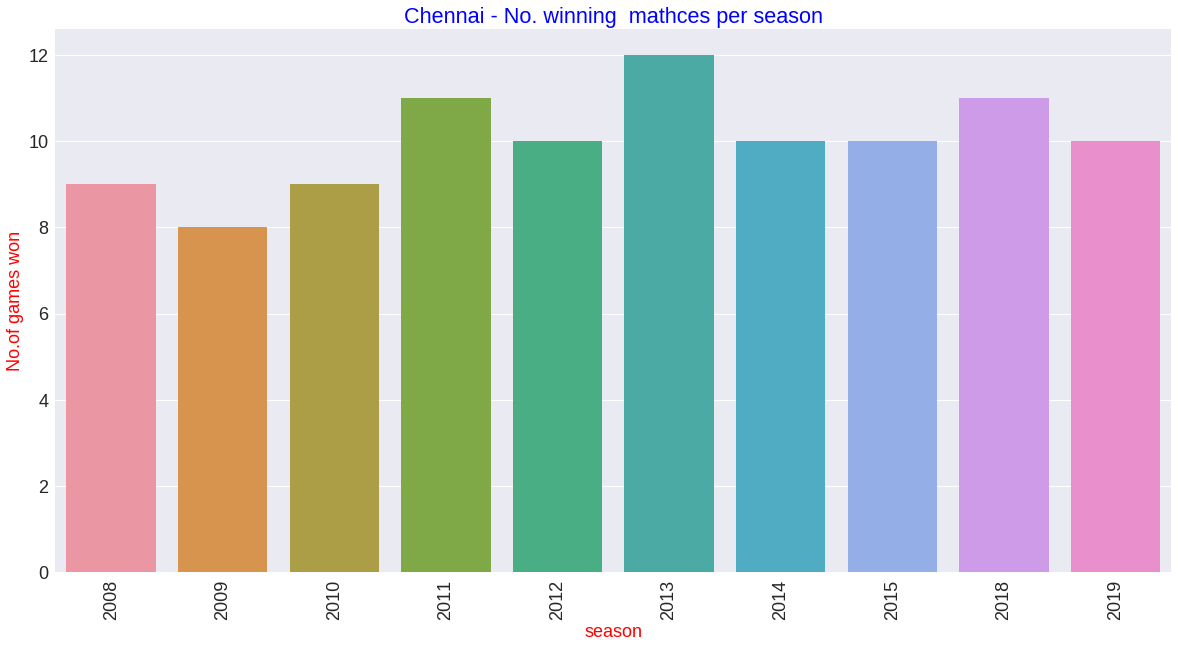

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Chennai - No. winning  mathces per season",color='b')

# BCreate the bar chart
sns.barplot(x=chennai_winning_summary_df['season'], y=chennai_winning_summary_df['No.of games won'])

# Add label for vertical axis
plt.xticks(rotation = 'vertical')

In [12]:
# Get the unique teams from team1 column
match_df.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [13]:
# Get the unique teams from team2 column
match_df.team2.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [14]:
chennai_matches_playing_as_team1_df = match_df[(match_df['team1']=='Chennai Super Kings')]
chennai_matches_playing_as_team1_df.reset_index(inplace=True,drop=True)
chennai_matches_playing_as_team2_df = match_df[(match_df['team2']=='Chennai Super Kings')]
chennai_matches_playing_as_team2_df.reset_index(inplace=True,drop=True)

In [15]:
# Preprocessing  steps: Modifying Team 1 as Team 2 and vice-versa
chennai_matches_playing_as_team2_df.columns = ['id', 'season', 'city', 'date', 'team2', 'team1', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3']

chennai_matches_playing_as_team2_df = chennai_matches_playing_as_team2_df[['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3']].copy()

chennai_matches_playing_as_team2_df.reset_index(inplace=True,drop=True)

In [16]:
# Get only Chennai matches from the dataset by combining both Chennai playing as Team 1 and playing as Team2
chennai_match_df = pd.concat([chennai_matches_playing_as_team1_df,chennai_matches_playing_as_team2_df])

In [17]:
# Reset the index 
chennai_match_df.reset_index(drop=True,inplace=True)

In [18]:
# Check the data for few records
chennai_match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
1,67,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
2,74,2008,Bangalore,28-04-2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
3,79,2008,Chennai,02-05-2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
4,83,2008,Jaipur,04-05-2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN


# Impact of toss on their win percentage.

### Chennai won toss and won match

In [19]:
chennai_won_toss_won_match = chennai_match_df[(chennai_match_df['toss_winner']=='Chennai Super Kings') &(chennai_match_df['winner']=='Chennai Super Kings')]
chennai_won_toss_won_match.reset_index(inplace=True,drop=True)
win_percentage =  (chennai_won_toss_won_match.shape[0]/chennai_match_df.shape[0]) * 100
print(f"Chennai win % when the win toss is {win_percentage:.2f} %")


Chennai win % when the win toss is 34.76 %


### Chennai lost toss and won match

In [20]:
chennai_lost_toss_won_match = chennai_match_df[(chennai_match_df['toss_winner']!='Chennai Super Kings') &(chennai_match_df['winner']=='Chennai Super Kings')]
chennai_lost_toss_won_match.reset_index(inplace=True,drop=True)
win_percentage =  (chennai_lost_toss_won_match.shape[0]/chennai_match_df.shape[0]) * 100
print(f"Chennai win % when the lose toss is {win_percentage:.2f} %")

Chennai win % when the lose toss is 26.22 %


# Impact of venue on their win percentage.

In [21]:
venue_df = chennai_match_df.copy()


In [22]:
venue_df = venue_df.city.value_counts().rename_axis('venue').reset_index(name='match_counts')
venue_df

,venue,match_counts
0,Chennai,56
1,Mumbai,20
2,Kolkata,11
3,Pune,8
4,Delhi,8
5,Bangalore,7
6,Jaipur,6
7,Hyderabad,6
8,Ranchi,5
9,Chandigarh,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

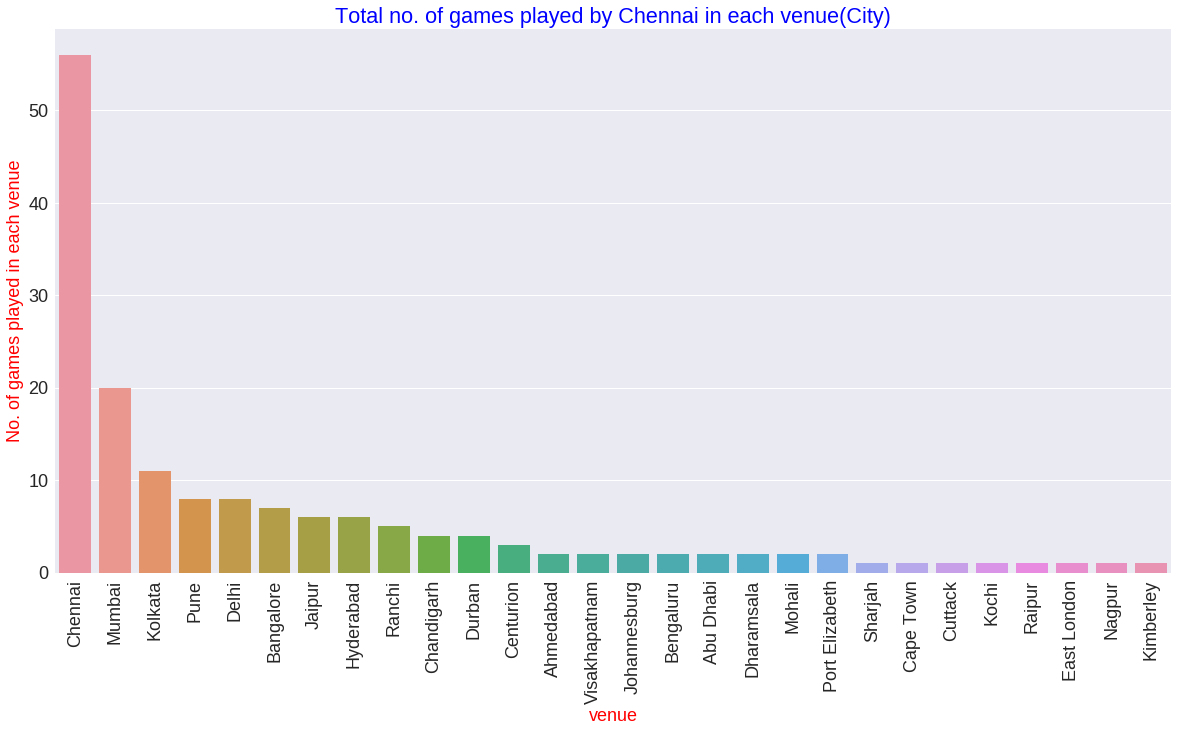

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Total no. of games played by Chennai in each venue(City)",color='b')

# BCreate the bar chart
sns.barplot(x=venue_df['venue'], y=venue_df['match_counts'])

# Add label for vertical axis
plt.ylabel("No. of games played in each venue")
plt.xticks(rotation = 'vertical')

In [24]:
venue_winning_df = chennai_match_df.copy()
chennai_winning_venue_df = venue_winning_df[venue_winning_df['winner']=='Chennai Super Kings'].city.value_counts().rename_axis('winning_venue').reset_index(name='winning_match_counts')
chennai_winning_venue_df

,winning_venue,winning_match_counts
0,Chennai,40
1,Mumbai,11
2,Pune,6
3,Delhi,6
4,Kolkata,5
5,Bangalore,4
6,Jaipur,3
7,Chandigarh,3
8,Hyderabad,3
9,Ranchi,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

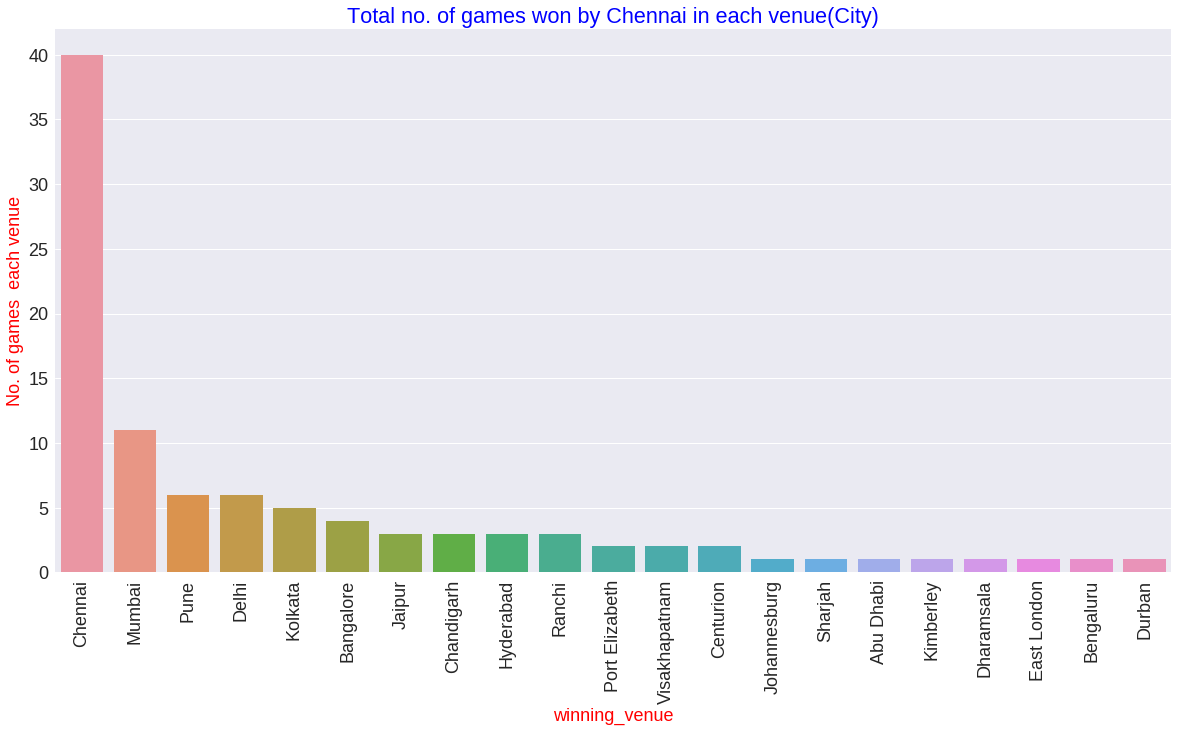

In [25]:

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Total no. of games won by Chennai in each venue(City)",color='b')

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=chennai_winning_venue_df['winning_venue'], y=chennai_winning_venue_df['winning_match_counts'])

# Add label for vertical axis
plt.ylabel("No. of games  each venue")
plt.xticks(rotation = 'vertical')

In [26]:
# merging 2 dfs to get the final winning % result
chennai_winning_final_df = pd.merge(venue_df,chennai_winning_venue_df,left_on=['venue'],right_on=['winning_venue'],how='left')
chennai_winning_final_df['winning_match_counts'].fillna(0,inplace=True)

In [27]:
chennai_winning_final_df['winning_percentage'] = (chennai_winning_final_df['winning_match_counts'] / chennai_winning_final_df['match_counts']) * 100

In [28]:
chennai_winning_final_df.columns 

Index(['venue', 'match_counts', 'winning_venue', 'winning_match_counts',
       'winning_percentage'],
      dtype='object')

In [29]:
chennai_winning_final_df[['venue', 'match_counts', 'winning_percentage']]

,venue,match_counts,winning_percentage
0,Chennai,56,71.428571
1,Mumbai,20,55.000000
2,Kolkata,11,45.454545
3,Pune,8,75.000000
4,Delhi,8,75.000000
5,Bangalore,7,57.142857
6,Jaipur,6,50.000000
7,Hyderabad,6,50.000000
8,Ranchi,5,60.000000
9,Chandigarh,4,75.000000


[Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%'),
 Text(0, 0, '120%')]

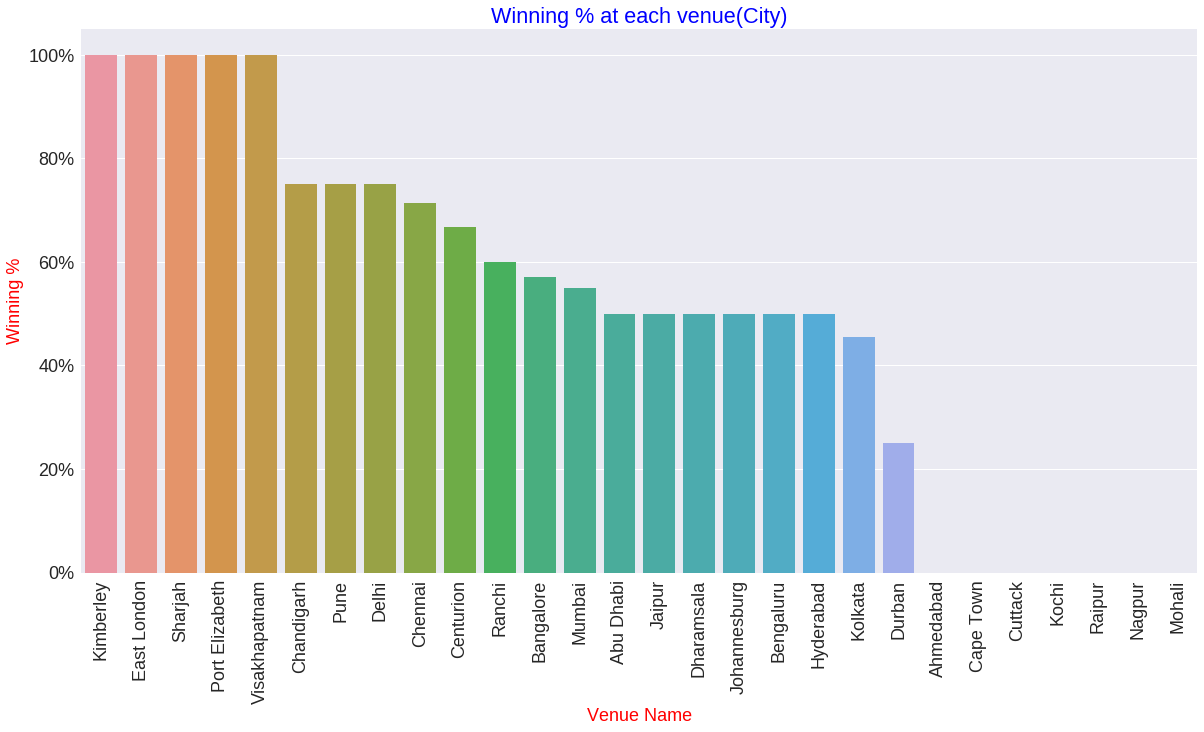

In [30]:

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Winning % at each venue(City)",color='b')

# Create the bar chart
sns.barplot(x=chennai_winning_final_df['venue'], 
            y=chennai_winning_final_df['winning_percentage'],
            order=chennai_winning_final_df.sort_values('winning_percentage',ascending = False).venue)

# Add label for vertical axis
plt.ylabel("Winning %")
plt.xlabel("Venue Name")
plt.xticks(rotation = 'vertical')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

# Who is their most impactful player against each team (man of the match).

In [31]:
chennai_winning_team_df = chennai_match_df[chennai_match_df['winner']=='Chennai Super Kings']
chennai_winning_team_df.shape

(100, 18)

In [32]:
chennai_winning_team_as_playing_team1_df = chennai_winning_team_df[chennai_winning_team_df['team1']=='Chennai Super Kings'].groupby(['team2','player_of_match']).size().reset_index()
chennai_winning_team_as_playing_team1_df.columns = ['opposite_team','player_of_match','no_times_won_as_player_of_match']

In [33]:

impactful_player_df = chennai_winning_team_as_playing_team1_df.copy()
impactful_player_df = impactful_player_df.groupby(['opposite_team','player_of_match']).no_times_won_as_player_of_match.agg([sum]).reset_index()

In [34]:
impactful_player_df.sort_values(by=['sum'],ascending=False,inplace=True)
impactful_player_df.reset_index(inplace=True,drop=True)

In [35]:
impactful_player_df.columns = ['opposite_team','player_of_match','No.of times won MOM']

In [36]:
impactful_player_df['opposite_team'].unique()

array(['Rajasthan Royals', 'Mumbai Indians', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Deccan Chargers',
       'Pune Warriors', 'Delhi Capitals', 'Kochi Tuskers Kerala'],
      dtype=object)

### Top impactful players for CSK of all seasons (Winning Team- CSK)

In [37]:
impactful_player_all_time_df = impactful_player_df.groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_all_time_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,No.of times won MOM
22,MS Dhoni,15
29,SK Raina,12
19,MEK Hussey,10
25,RA Jadeja,8
30,SR Watson,5
18,M Vijay,5
20,ML Hayden,4
8,F du Plessis,4
0,A Nehra,3
7,DR Smith,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

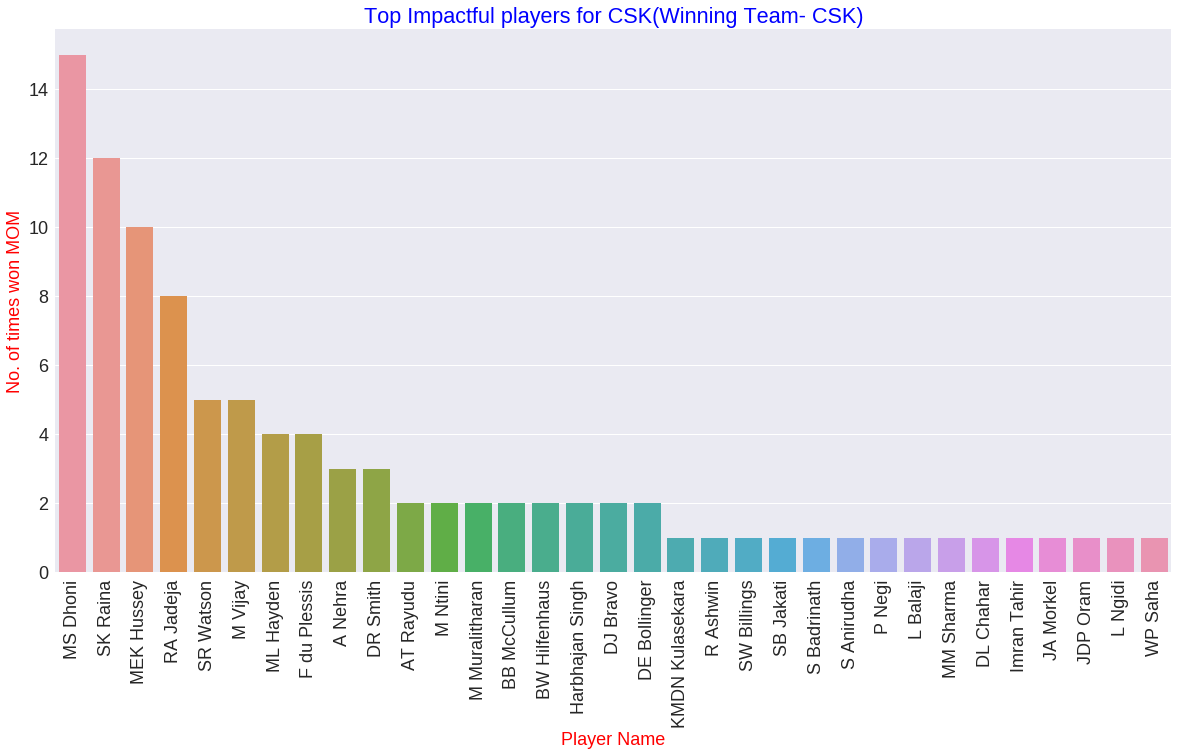

In [102]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Top Impactful players for CSK(Winning Team- CSK)",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_all_time_df['player_of_match'], 
            y=impactful_player_all_time_df['No.of times won MOM'],
            order=impactful_player_all_time_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.ylabel("No. of times won MOM")
plt.xlabel("Player Name")
plt.xticks(rotation = 'vertical')

### Impactful player against RCB

In [39]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Royal Challengers Bangalore']

,opposite_team,player_of_match,No.of times won MOM
3,Royal Challengers Bangalore,MS Dhoni,3
4,Royal Challengers Bangalore,SK Raina,3
6,Royal Challengers Bangalore,RA Jadeja,2
10,Royal Challengers Bangalore,M Vijay,2
30,Royal Challengers Bangalore,A Nehra,1
31,Royal Challengers Bangalore,F du Plessis,1
32,Royal Challengers Bangalore,Harbhajan Singh,1
33,Royal Challengers Bangalore,M Muralitharan,1
34,Royal Challengers Bangalore,MEK Hussey,1


In [40]:
impactful_player_against_banglore_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Royal Challengers Bangalore']
impactful_player_against_banglore_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

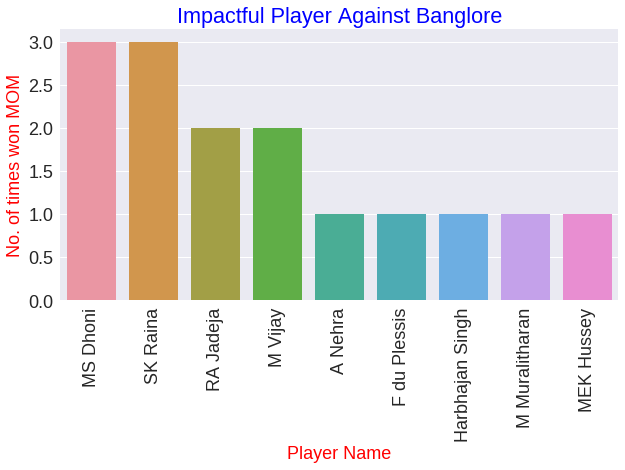

In [41]:

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Banglore",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_banglore_df['player_of_match'], 
            y=impactful_player_against_banglore_df['No.of times won MOM'],
            order=impactful_player_against_banglore_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against MI

In [42]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Mumbai Indians']

,opposite_team,player_of_match,No.of times won MOM
1,Mumbai Indians,SK Raina,3
13,Mumbai Indians,ML Hayden,2
17,Mumbai Indians,MS Dhoni,1
18,Mumbai Indians,MM Sharma,1
25,Mumbai Indians,MEK Hussey,1
28,Mumbai Indians,DJ Bravo,1
40,Mumbai Indians,DR Smith,1
42,Mumbai Indians,A Nehra,1


In [43]:
impactful_player_against_MI_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Mumbai Indians']
impactful_player_against_MI_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

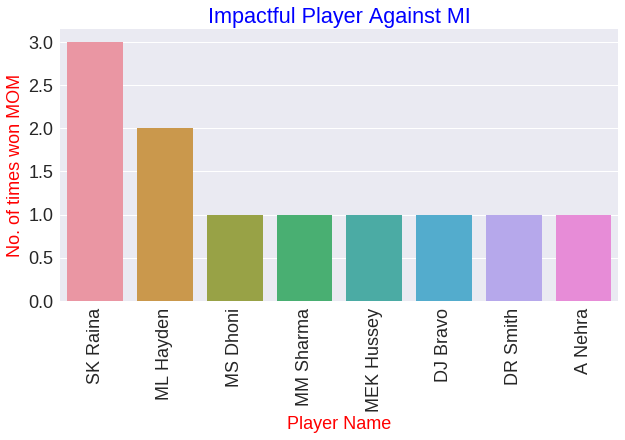

In [44]:

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against MI",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_MI_df['player_of_match'], 
            y=impactful_player_against_MI_df['No.of times won MOM'],
            order=impactful_player_against_MI_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Delhi Daredevils

In [45]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Daredevils']

,opposite_team,player_of_match,No.of times won MOM
2,Delhi Daredevils,MS Dhoni,3
45,Delhi Daredevils,SR Watson,1
46,Delhi Daredevils,SK Raina,1
47,Delhi Daredevils,SB Jakati,1
48,Delhi Daredevils,ML Hayden,1
49,Delhi Daredevils,MEK Hussey,1
50,Delhi Daredevils,M Vijay,1
51,Delhi Daredevils,DR Smith,1
52,Delhi Daredevils,BW Hilfenhaus,1
53,Delhi Daredevils,A Nehra,1


In [46]:
impactful_player_against_DD_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Daredevils']
impactful_player_against_DD_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

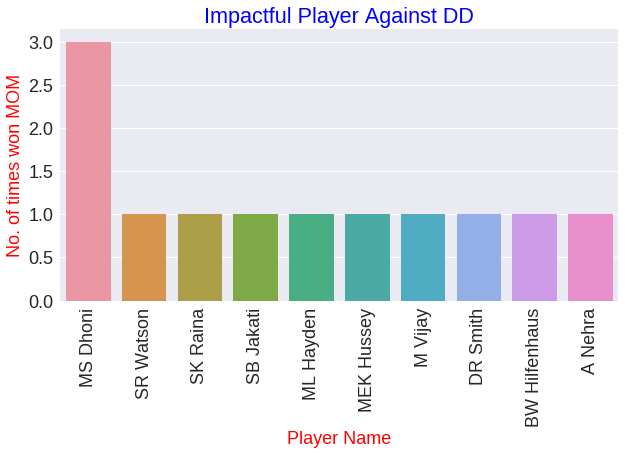

In [47]:

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against DD",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_DD_df['player_of_match'], 
            y=impactful_player_against_DD_df['No.of times won MOM'],
            order=impactful_player_against_DD_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Rajasthan Royals

In [48]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Rajasthan Royals']

,opposite_team,player_of_match,No.of times won MOM
0,Rajasthan Royals,RA Jadeja,3
8,Rajasthan Royals,MS Dhoni,2
9,Rajasthan Royals,M Vijay,2
16,Rajasthan Royals,MEK Hussey,2
23,Rajasthan Royals,BW Hilfenhaus,1
24,Rajasthan Royals,F du Plessis,1
26,Rajasthan Royals,SK Raina,1
27,Rajasthan Royals,S Badrinath,1
29,Rajasthan Royals,SR Watson,1


In [49]:
impactful_player_against_RR_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Rajasthan Royals']
impactful_player_against_RR_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

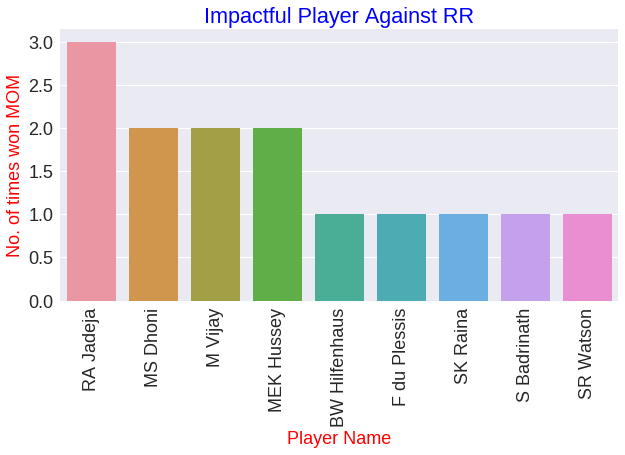

In [50]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against RR",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_RR_df['player_of_match'], 
            y=impactful_player_against_RR_df['No.of times won MOM'],
            order=impactful_player_against_RR_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Deccan Chargers

In [51]:
impactful_player_df[impactful_player_df['opposite_team'] =='Deccan Chargers']

,opposite_team,player_of_match,No.of times won MOM
14,Deccan Chargers,SK Raina,2
41,Deccan Chargers,DE Bollinger,1
57,Deccan Chargers,RA Jadeja,1
58,Deccan Chargers,MS Dhoni,1
63,Deccan Chargers,JA Morkel,1


In [52]:
impactful_player_against_DC_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Deccan Chargers']
impactful_player_against_DC_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

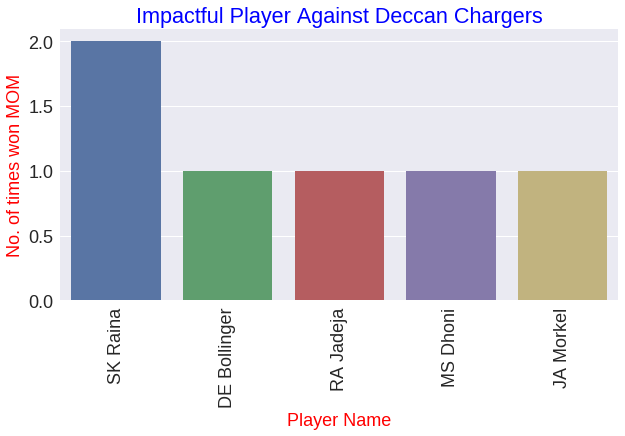

In [53]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Deccan Chargers",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_DC_df['player_of_match'], 
            y=impactful_player_against_DC_df['No.of times won MOM'],
            order=impactful_player_against_DC_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Pune Warriors

In [54]:
impactful_player_df[impactful_player_df['opposite_team'] =='Pune Warriors']

,opposite_team,player_of_match,No.of times won MOM
19,Pune Warriors,DE Bollinger,1
20,Pune Warriors,KMDN Kulasekara,1
21,Pune Warriors,MEK Hussey,1
22,Pune Warriors,MS Dhoni,1


In [55]:
impactful_player_against_PW_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Pune Warriors']
impactful_player_against_PW_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

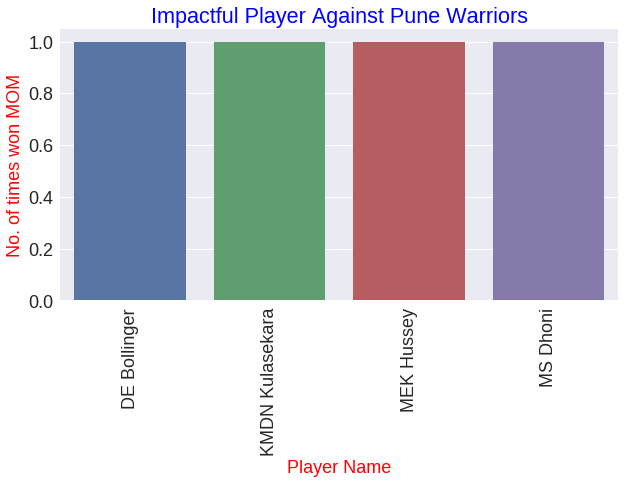

In [56]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Pune Warriors",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_PW_df['player_of_match'], 
            y=impactful_player_against_PW_df['No.of times won MOM'],
            order=impactful_player_against_PW_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Kolkata Knight Riders

In [57]:
impactful_player_df[impactful_player_df['opposite_team'] =='Kolkata Knight Riders']

,opposite_team,player_of_match,No.of times won MOM
12,Kolkata Knight Riders,MEK Hussey,2
15,Kolkata Knight Riders,RA Jadeja,2
43,Kolkata Knight Riders,SW Billings,1
62,Kolkata Knight Riders,DL Chahar,1
64,Kolkata Knight Riders,R Ashwin,1
65,Kolkata Knight Riders,MS Dhoni,1
66,Kolkata Knight Riders,M Ntini,1
67,Kolkata Knight Riders,JDP Oram,1
68,Kolkata Knight Riders,Imran Tahir,1
69,Kolkata Knight Riders,DJ Bravo,1


In [58]:
impactful_player_against_KKR_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Kolkata Knight Riders']
impactful_player_against_KKR_df.reset_index(inplace=True,drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

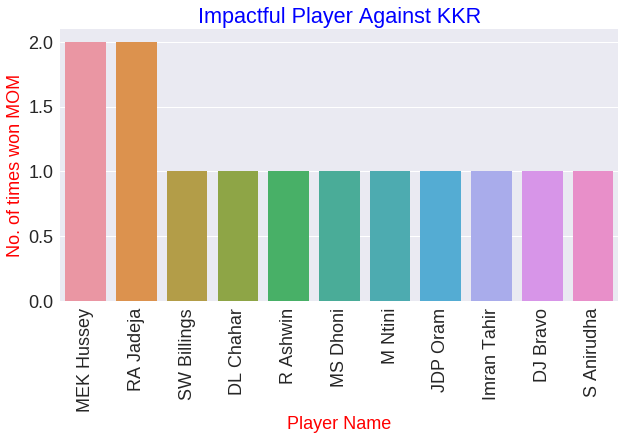

In [59]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against KKR",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_KKR_df['player_of_match'], 
            y=impactful_player_against_KKR_df['No.of times won MOM'],
            order=impactful_player_against_KKR_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Sunrisers Hyderabad

In [60]:
impactful_player_df[impactful_player_df['opposite_team'] =='Sunrisers Hyderabad']

,opposite_team,player_of_match,No.of times won MOM
5,Sunrisers Hyderabad,SR Watson,2
11,Sunrisers Hyderabad,AT Rayudu,2
35,Sunrisers Hyderabad,BB McCullum,1
36,Sunrisers Hyderabad,DR Smith,1
37,Sunrisers Hyderabad,F du Plessis,1
38,Sunrisers Hyderabad,MS Dhoni,1
39,Sunrisers Hyderabad,SK Raina,1


In [61]:
impactful_player_against_SH_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Sunrisers Hyderabad']
impactful_player_against_SH_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

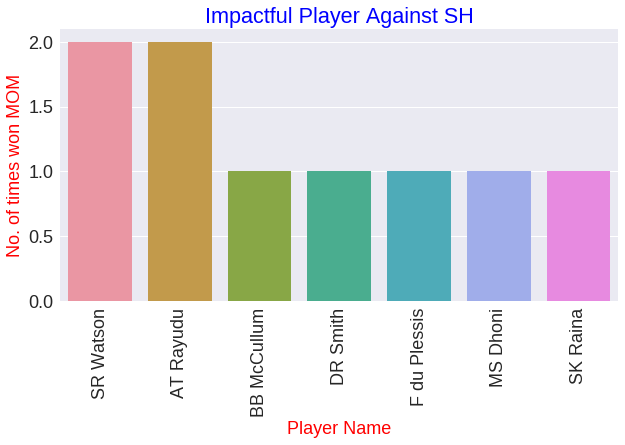

In [62]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against SH",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_SH_df['player_of_match'], 
            y=impactful_player_against_SH_df['No.of times won MOM'],
            order=impactful_player_against_SH_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

 ### Impactful player against Delhi Capitals

In [63]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Capitals']

,opposite_team,player_of_match,No.of times won MOM
54,Delhi Capitals,SR Watson,1
55,Delhi Capitals,MS Dhoni,1
56,Delhi Capitals,F du Plessis,1


In [64]:
impactful_player_against_DC_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Capitals']
impactful_player_against_DC_df.reset_index(inplace=True,drop=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

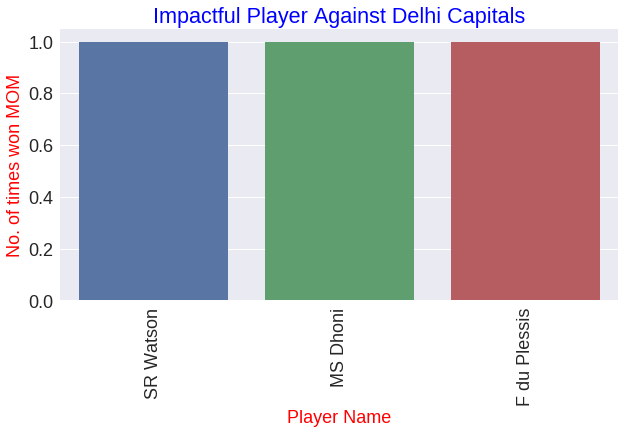

In [65]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Delhi Capitals",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_DC_df['player_of_match'], 
            y=impactful_player_against_DC_df['No.of times won MOM'],
            order=impactful_player_against_DC_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Kings XI Punjab

In [66]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Kings XI Punjab']

,opposite_team,player_of_match,No.of times won MOM
7,Kings XI Punjab,MEK Hussey,2
44,Kings XI Punjab,BB McCullum,1
59,Kings XI Punjab,Harbhajan Singh,1
60,Kings XI Punjab,L Balaji,1
61,Kings XI Punjab,L Ngidi,1
70,Kings XI Punjab,M Muralitharan,1
72,Kings XI Punjab,SK Raina,1
73,Kings XI Punjab,P Negi,1
74,Kings XI Punjab,MS Dhoni,1
75,Kings XI Punjab,ML Hayden,1


In [67]:
impactful_player_against_KP_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Kings XI Punjab']
impactful_player_against_KP_df.reset_index(inplace=True,drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

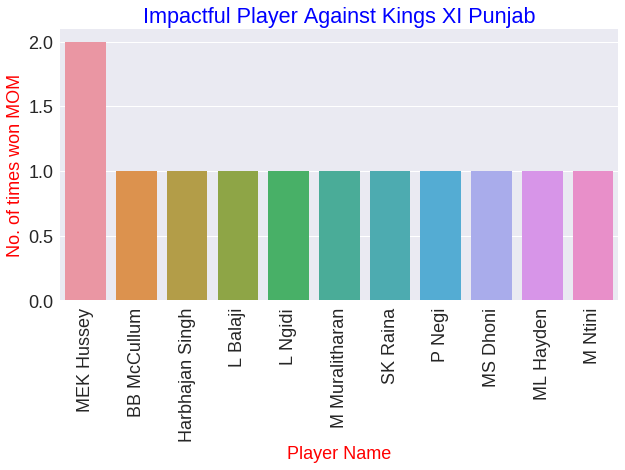

In [68]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Kings XI Punjab",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_KP_df['player_of_match'], 
            y=impactful_player_against_KP_df['No.of times won MOM'],
            order=impactful_player_against_KP_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

### Impactful player against Kochi Tuskers Kerala

In [69]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Kochi Tuskers Kerala']

,opposite_team,player_of_match,No.of times won MOM
71,Kochi Tuskers Kerala,WP Saha,1


In [70]:
impactful_player_against_KT_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Kochi Tuskers Kerala']
impactful_player_against_KT_df.reset_index(inplace=True,drop=True)

(array([0]), <a list of 1 Text xticklabel objects>)

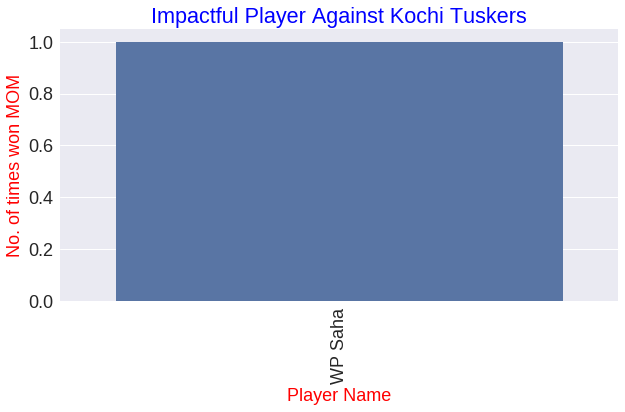

In [71]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Impactful Player Against Kochi Tuskers",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_against_KT_df['player_of_match'], 
            y=impactful_player_against_KT_df['No.of times won MOM'],
            order=impactful_player_against_KT_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.xlabel("Player Name")
plt.ylabel("No. of times won MOM")

plt.xticks(rotation = 'vertical')

# Which are the top most (3) difficult teams to beat.

In [72]:
total_matches_played_by_chennai = chennai_match_df.shape[0]
total_matches_lost_by_chennai = chennai_match_df[chennai_match_df['winner']!='Chennai Super Kings'].shape[0]
chennai_losing_percentage = (total_matches_lost_by_chennai/total_matches_played_by_chennai) * 100
print('Total matches played by Chennai',total_matches_played_by_chennai)
print('Total mathces lost by chennai',total_matches_lost_by_chennai)
print(f'Chennai overall losing percentage {chennai_losing_percentage:.2f} %')

Total matches played by Chennai 164
Total mathces lost by chennai 64
Chennai overall losing percentage 39.02 %


In [73]:
chennai_lost_match_df = chennai_match_df[chennai_match_df['winner']!='Chennai Super Kings']
chennai_lost_match_df.reset_index(inplace=True,drop=True)

In [74]:
chennai_lost_match_df = chennai_lost_match_df.groupby('winner').size().reset_index()

In [75]:
chennai_lost_match_df.columns = ['rival_team','no_of_times_lost']

In [76]:
chennai_lost_match_df

,rival_team,no_of_times_lost
0,Deccan Chargers,4
1,Delhi Daredevils,6
2,Kings XI Punjab,9
3,Kochi Tuskers Kerala,1
4,Kolkata Knight Riders,7
5,Mumbai Indians,17
6,Pune Warriors,2
7,Rajasthan Royals,7
8,Royal Challengers Bangalore,8
9,Sunrisers Hyderabad,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

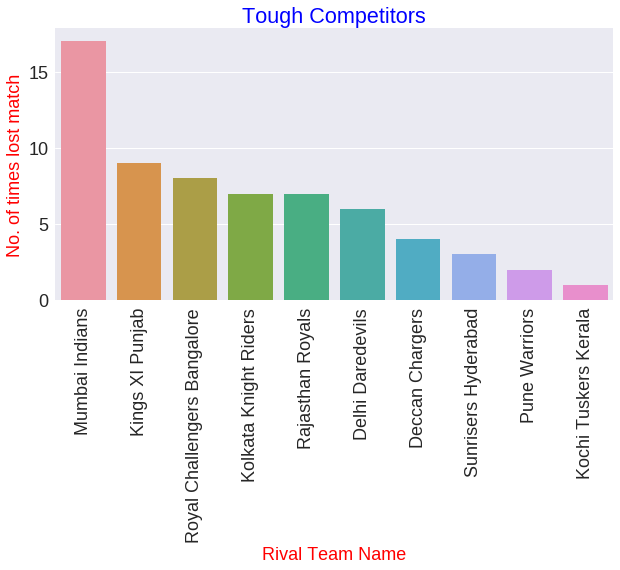

In [77]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Tough Competitors",color='b')

# Create the bar chart
sns.barplot(x=chennai_lost_match_df['rival_team'], 
            y=chennai_lost_match_df['no_of_times_lost'],
            order=chennai_lost_match_df.sort_values('no_of_times_lost',ascending = False).rival_team)

# Add label for vertical axis
plt.xlabel("Rival Team Name")
plt.ylabel("No. of times lost match")

plt.xticks(rotation = 'vertical')

# Impact of toss on their win percentage against the 3 most difficult teams to beat.

In [78]:
toss_winning_df = chennai_match_df.groupby(['team1','team2','toss_winner','winner']).size()
# toss_winning_df.reset_index(inplace=True,drop=True)

In [79]:
toss_winning_df  = toss_winning_df.reset_index()
toss_winning_df.columns = ['team1', 'team2', 'toss_winner', 'winner', 'no_of_matches']

In [80]:
toss_winning_df[toss_winning_df['team2'] =='Mumbai Indians']

,team1,team2,toss_winner,winner,no_of_matches
20,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,6
21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Mumbai Indians,7
22,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Chennai Super Kings,5
23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Mumbai Indians,10


In [81]:
toss_winning_df[toss_winning_df['team2'] =='Kolkata Knight Riders']

,team1,team2,toss_winner,winner,no_of_matches
16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,7
17,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,4
18,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,6
19,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,3


In [82]:
toss_winning_df[toss_winning_df['team2'] =='Rajasthan Royals'] 


,team1,team2,toss_winner,winner,no_of_matches
28,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,4
29,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,3
30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,Chennai Super Kings,10
31,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,4


# If they win the toss, what should they opt for (bat/bowl) against each team, considering their toss decision - win ratio.

In [83]:
toss_winning_df = chennai_match_df.groupby(['team1','team2','toss_winner','toss_decision','winner']).size()

In [84]:
toss_winning_df = toss_winning_df.reset_index()

In [85]:
toss_winning_df.columns = ['team1', 'team2', 'toss_winner','toss_decision','winner', 'no_of_matches']

In [86]:
toss_winning_df['team2'].unique()

array(['Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils',
       'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

### Deccan Chargers 

In [87]:
toss_winning_df[toss_winning_df['team2']== 'Deccan Chargers']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,bat,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,bat,Deccan Chargers,1
4,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
5,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2


### Delhi Capitals

In [88]:
toss_winning_df[toss_winning_df['team2']=='Delhi Capitals']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
6,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,field,Chennai Super Kings,1
7,Chennai Super Kings,Delhi Capitals,Delhi Capitals,bat,Chennai Super Kings,1
8,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


### Delhi Daredevils

In [89]:
toss_winning_df[toss_winning_df['team2']=='Delhi Daredevils']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
9,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,4
10,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Delhi Daredevils,3
11,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,field,Chennai Super Kings,3
12,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,field,Delhi Daredevils,1
13,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,bat,Chennai Super Kings,1
14,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,bat,Delhi Daredevils,1
15,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Chennai Super Kings,4
16,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,1


### Kings XI Punjab

In [90]:
toss_winning_df[toss_winning_df['team2']=='Kings XI Punjab']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
17,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,6
18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,1
19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,3
20,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,4
21,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,bat,Chennai Super Kings,2
22,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,bat,Kings XI Punjab,1
23,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,Chennai Super Kings,1
24,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,3


### Kochi Tuskers Kerala

In [91]:
toss_winning_df[toss_winning_df['team2']=='Kochi Tuskers Kerala']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
25,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,bat,Chennai Super Kings,1
26,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,1


### Kolkata Knight Riders

In [92]:
toss_winning_df[toss_winning_df['team2']=='Kolkata Knight Riders']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,3
28,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders,4
29,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,field,Chennai Super Kings,4
30,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,4
31,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,2
32,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,3


### Mumbai Indians

In [93]:
toss_winning_df[toss_winning_df['team2']=='Mumbai Indians']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
33,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,3
34,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,2
35,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Chennai Super Kings,3
36,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,5
37,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,3
38,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,5
39,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,2
40,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,5


### Pune Warriors

In [94]:
toss_winning_df[toss_winning_df['team2']=='Pune Warriors']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
41,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,Chennai Super Kings,1
42,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,Pune Warriors,1
43,Chennai Super Kings,Pune Warriors,Pune Warriors,bat,Chennai Super Kings,1
44,Chennai Super Kings,Pune Warriors,Pune Warriors,bat,Pune Warriors,1
45,Chennai Super Kings,Pune Warriors,Pune Warriors,field,Chennai Super Kings,2


### Rajasthan Royals

In [95]:
toss_winning_df[toss_winning_df['team2']=='Rajasthan Royals']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
46,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,2
47,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,3
48,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,field,Chennai Super Kings,2
49,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,bat,Chennai Super Kings,5
50,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,2
51,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,5
52,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,2


### Royal Challengers Bangalore

In [96]:
toss_winning_df[toss_winning_df['team2']=='Royal Challengers Bangalore']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
53,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,5
54,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Royal Challengers Bangalore,2
55,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,field,Chennai Super Kings,7
56,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,field,Royal Challengers Bangalore,3
57,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Chennai Super Kings,2
58,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,1
59,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Chennai Super Kings,1
60,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,2


### Sunrisers Hyderabad

In [97]:
toss_winning_df[toss_winning_df['team2']=='Sunrisers Hyderabad']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
61,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,1
62,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Sunrisers Hyderabad,1
63,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,field,Chennai Super Kings,4
64,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,field,Sunrisers Hyderabad,1
65,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Chennai Super Kings,2
66,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Chennai Super Kings,2
67,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1
